## Predicting Market Movements with Machine Learning

In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
x = np.linspace(0, 10)

def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)


set_seeds()

In [3]:
y = x + np.random.standard_normal(len(x))

In [4]:
reg = np.polyfit(x, y, deg=1)

In [5]:
reg

array([0.94612934, 0.22855261])

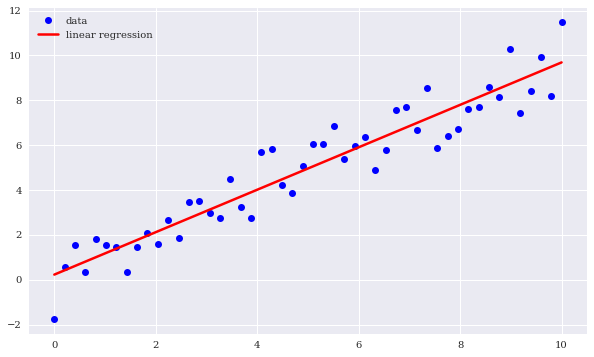

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0);

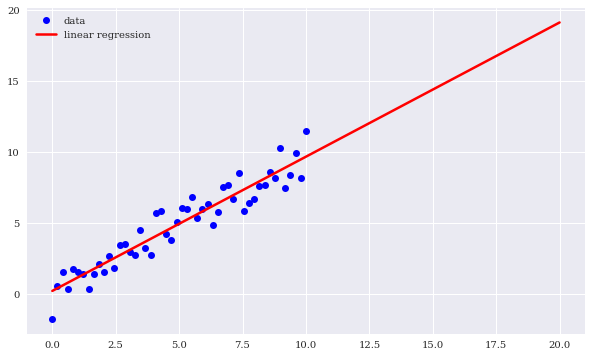

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0);

## The Basic Idea for Price Prediction

In [8]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
lags = 3

m = np.zeros((lags + 1, len(x) - lags))

m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]


In [10]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [11]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [12]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]

In [13]:
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [14]:
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

## Predicting Index Levels

In [15]:
import pandas as pd

raw = pd.read_csv(
    'http://hilpisch.com/pyalgo_eikon_eod_data.csv',
    index_col=0,
    parse_dates=True,
).dropna()

In [16]:
raw.head(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51


In [17]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [18]:
symbol = 'EUR='

In [19]:
data = pd.DataFrame(raw[symbol])

In [20]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [21]:
lags = 5

cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)


In [22]:
data.head(10)

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-04,1.4411,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.4368,1.4411,NaN,NaN,NaN,NaN
2010-01-06,1.4412,1.4368,1.4411,NaN,NaN,NaN
2010-01-07,1.4318,1.4412,1.4368,1.4411,NaN,NaN
2010-01-08,1.4412,1.4318,1.4412,1.4368,1.4411,NaN
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318


In [23]:
data.dropna(inplace=True)

In [24]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]

In [25]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [26]:
data['prediction'] = np.dot(data[cols], reg)

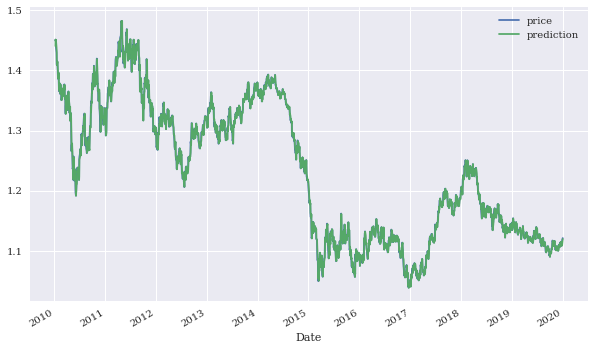

In [27]:
data[['price', 'prediction']].plot(figsize=(10, 6));

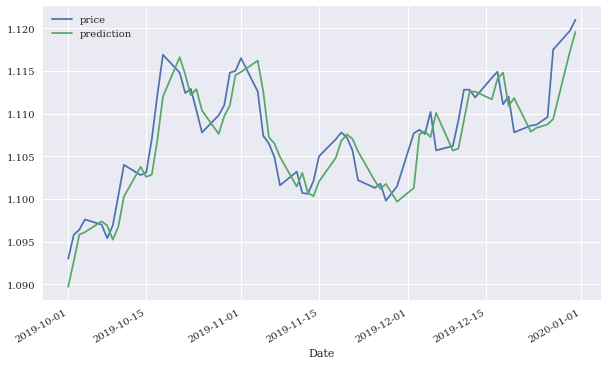

In [28]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize=(10, 6));

## Predicting Future Returns

In [29]:
data['return'] = np.log(data['price'] / data['price'].shift(1))
data.dropna(inplace=True)

In [30]:
cols = []

for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <3>
    cols.append(col)
    
data.dropna(inplace=True)

reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [31]:
data['prediction'] = np.dot(data[cols], reg)

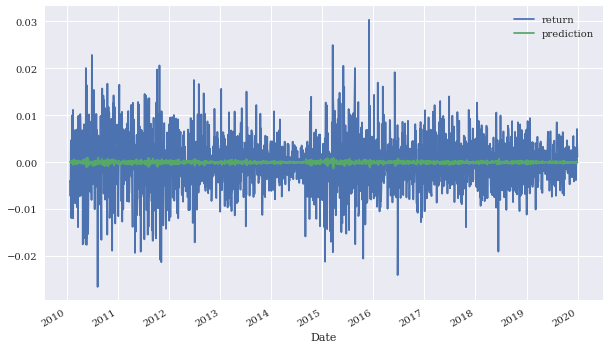

In [32]:
data[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6));

In [33]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [34]:
hits

 1.0    1250
-1.0    1242
 0.0      13
dtype: int64

In [35]:
hits.values[0] / sum(hits)

0.499001996007984

## Prediction Future Market Direction

In [36]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)[0]

reg

array([-5.11938725, -2.24077248, -5.13080606, -3.03753232, -2.14819119])

In [37]:
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [38]:
data['prediction'].value_counts()

 1.0    1300
-1.0    1205
Name: prediction, dtype: int64

In [39]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [40]:
hits

 1.0    1301
-1.0    1191
 0.0      13
dtype: int64

In [41]:
hits.values[0] / sum(hits)

0.5193612774451097

## Vectorized Backtesting of Regression-based Strategy\

In [42]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.0,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.0,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.0,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.0,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.0,-0.005457


In [43]:
data['strategy'] = data['prediction'] * data['return']

In [44]:
data[['return', 'strategy']].sum().apply(np.exp)

return      0.784026
strategy    1.654154
dtype: float64

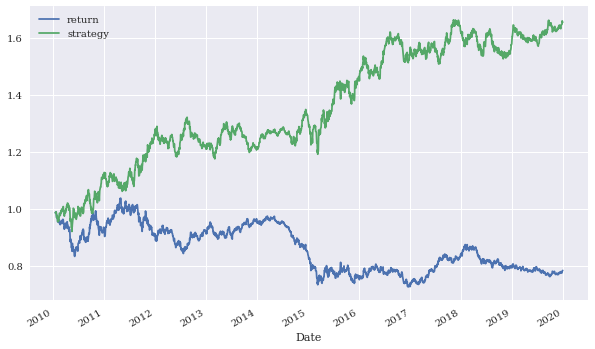

In [45]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

## Generalizing the Approach

In [46]:
import LRVectorBacktester as LR

lrbt = LR.LRVectorBacktester('EUR=', '2010-1-1', '2019-12-31', 10000, 0.0)


In [47]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=5)

(17166.53, 9442.42)

In [48]:
lrbt.run_strategy('2010-1-1', '2017-12-31',
                  '2018-1-1', '2019-12-31', lags=5)

(10160.86, 791.87)

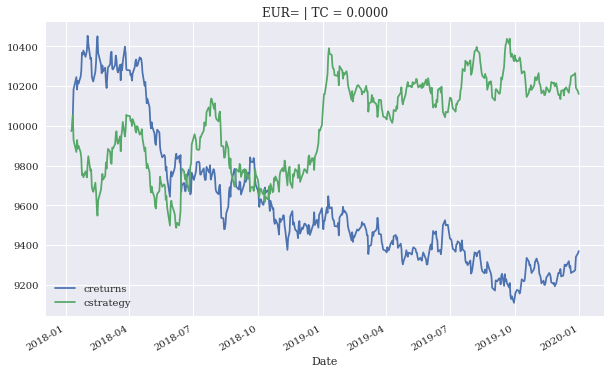

In [49]:
lrbt.plot_results()

In [50]:
lrbt = LR.LRVectorBacktester('GDX', '2010-1-1', '2019-12-31', 10000, 0.002)

In [51]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=7)  

(23642.32, 17649.69)

In [52]:
lrbt.run_strategy('2010-1-1', '2014-12-31',
                  '2015-1-1', '2019-12-31', lags=7)

(28513.35, 14888.41)

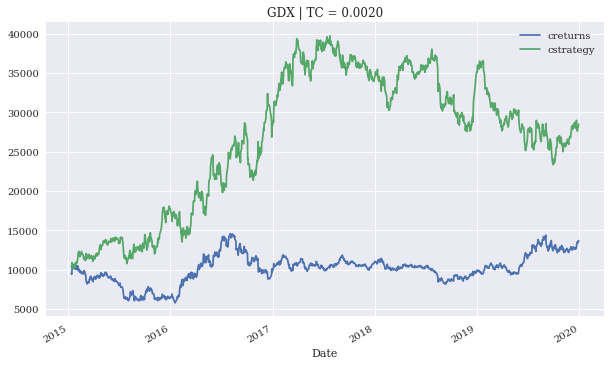

In [53]:
lrbt.plot_results()

## Using Machine Learning for Market Movement Prediction

In [54]:
import numpy as np

x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [55]:
lags = 3

In [56]:
m = np.zeros((lags + 1, len(x) - lags))

m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]


In [57]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(m[:lags].T, m[lags])

LinearRegression()

In [58]:
lm.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [59]:
lm.intercept_

2.0000000000000018

In [60]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [61]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(m[:lags].T, m[lags])

LinearRegression(fit_intercept=False)

In [62]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [63]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

## A Simple Classification Problem

In [64]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [65]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1])

In [66]:
reg = np.polyfit(hours, success, deg=1)

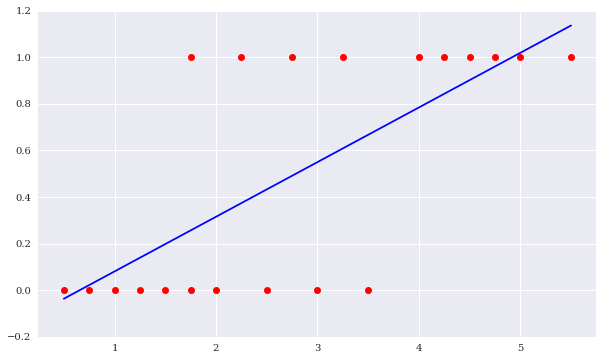

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2);

In [68]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [69]:
hrs = hours.reshape(1, -1).T

In [70]:
lm.fit(hrs, success)

LogisticRegression()

In [71]:
prediction = lm.predict(hrs)

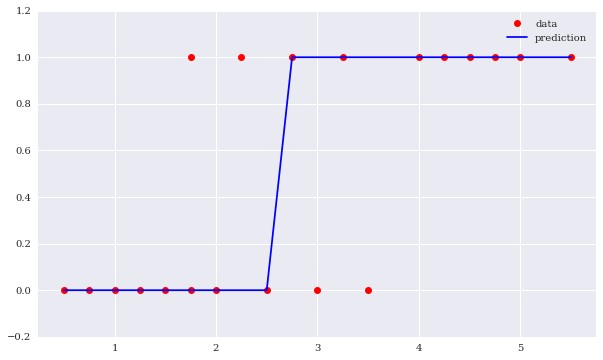

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2);

In [73]:
prob = lm.predict_proba(hrs)

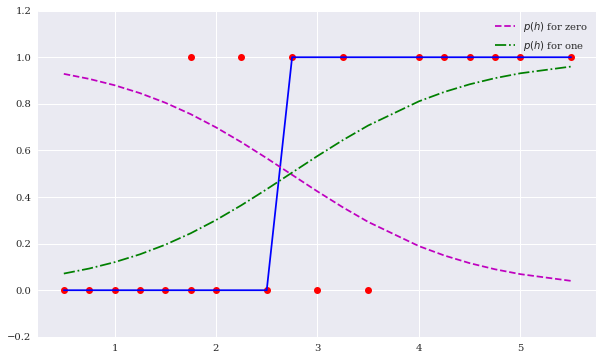

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--',
         label='$p(h)$ for zero')
plt.plot(hours, prob.T[1], 'g-.',
         label='$p(h)$ for one')
plt.ylim(-0.2, 1.2)
plt.legend(loc=0);

## Using Logistic Regression to Predict Market Direction

In [75]:
symbol = 'GLD'

In [76]:
data = pd.DataFrame(raw[symbol])

In [77]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [78]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [79]:
data.dropna(inplace=True)

In [80]:
lags = 3

cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)

In [81]:
data.dropna(inplace=True)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000)

In [84]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [85]:
data['prediction'] = lm.predict(data[cols])

In [86]:
data['prediction'].value_counts()

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [87]:
hits = np.sign(
    data['return'].iloc[lags:] *
    data['prediction'].iloc[lags:]
).value_counts()

In [88]:
hits

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [89]:
accuracy_score(data['prediction'],
               np.sign(data['return']))

0.5338375796178344

In [90]:
data['strategy'] = data['prediction'] * data['return']

In [91]:
data[['return', 'strategy']].sum().apply(np.exp)

return      1.289478
strategy    2.458716
dtype: float64

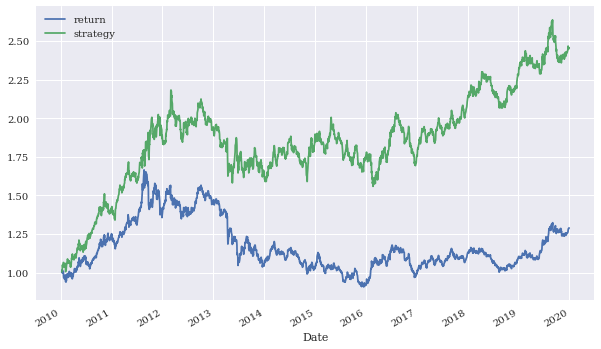

In [92]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [93]:
data = pd.DataFrame(raw[symbol])

In [94]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [95]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [96]:
lags = 5

cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    data[col] = data['price'].shift(lag)
    cols.append(col)


In [97]:
data.dropna(inplace=True)

In [98]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [99]:
data['prediction'] = lm.predict(data[cols])

In [100]:
data['prediction'].value_counts()

 1.0    2052
-1.0     459
Name: prediction, dtype: int64

In [101]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()

In [102]:
hits

 1.0    1326
-1.0    1168
 0.0      12
dtype: int64

In [103]:
accuracy_score(data['prediction'],
               np.sign(data['return']))

0.5292712066905615

In [104]:
data['strategy'] = data['prediction'] * data['return']

In [105]:
data[['return', 'strategy']].sum().apply(np.exp)

return      1.283110
strategy    2.450294
dtype: float64

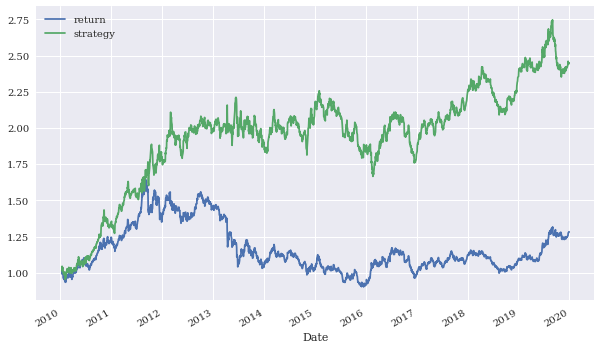

In [106]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Generalizing the Approach